Regression Problem on Housing Price Prediction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab
import seaborn as sn

from scipy.stats import skew
from scipy.stats.stats import pearsonr

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Starting with data preprocessing

- log the output variable: SalePrice
- combine train/test set
- find skewed features (skewness > 0.75)
- log skewed features
- fill in NA data with mean()
- split the train/test set back to original

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Training Data Shape: ",train.shape)
print("Testing Data Shape: ", test.shape)
print(train.head())

('Training Data Shape: ', (1460, 81))
('Testing Data Shape: ', (1459, 80))
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   


In [3]:
print(test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN   

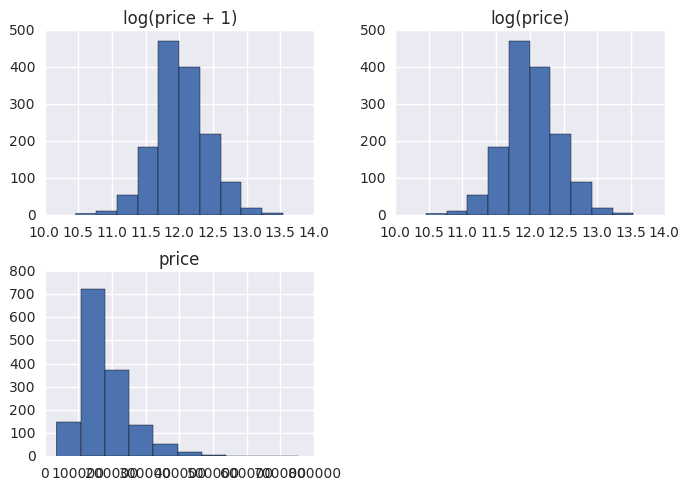

In [4]:
prices = pd.DataFrame({"price":train["SalePrice"], \
                       "log(price + 1)":np.log1p(train["SalePrice"]), \
                       "log(price)":np.log(train["SalePrice"]) \
                      })
_ = prices.hist()

In [5]:
all_train = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
print(all_train.shape)

(2919, 79)


In [6]:
# Log the output variable
train['SalePrice'] = np.log1p(train['SalePrice'])

In [7]:
# Find all skewed features that is > 0.75 and log them
numeric_features = all_train.dtypes[all_train.dtypes != "object"].index
skewed_features = all_train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 0.75].index
all_train[skewed_features] = np.log1p(all_train[skewed_features])
print(all_train[skewed_features].shape)

(2919, 22)


In [8]:
# Convert categorical features using dummies
all_train = pd.get_dummies(all_train)
print(all_train.dtypes.index)

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2',
       ...
       u'SaleType_ConLw', u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial'],
      dtype='object', length=288)


In [9]:
# Fill in missing values with mean
all_train = all_train.fillna(all_train.mean())
print(all_train.head())

   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    4.110874     4.189655  9.042040            7            5       2003   
1    3.044522     4.394449  9.169623            6            8       1976   
2    4.110874     4.234107  9.328212            7            5       2001   
3    4.262680     4.110874  9.164401            7            5       1915   
4    4.110874     4.442651  9.565284            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003    5.283204    6.561031         0.0          ...             
1          1976    0.000000    6.886532         0.0          ...             
2          2002    5.093750    6.188264         0.0          ...             
3          1970    0.000000    5.379897         0.0          ...             
4          2000    5.860786    6.486161         0.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0     

In [10]:
# Replace infinity values with 0
all_train = all_train.replace([np.inf, -np.inf], 0)
print(all_train.head())

   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    4.110874     4.189655  9.042040            7            5       2003   
1    3.044522     4.394449  9.169623            6            8       1976   
2    4.110874     4.234107  9.328212            7            5       2001   
3    4.262680     4.110874  9.164401            7            5       1915   
4    4.110874     4.442651  9.565284            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003    5.283204    6.561031         0.0          ...             
1          1976    0.000000    6.886532         0.0          ...             
2          2002    5.093750    6.188264         0.0          ...             
3          1970    0.000000    5.379897         0.0          ...             
4          2000    5.860786    6.486161         0.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0     

In [11]:
# Split train/test set back to the way it was.
x_train = all_train[:train.shape[0]]
x_test = all_train[train.shape[0]:]
print(x_train.head())
print(x_test.shape)
y_train = train['SalePrice']
print(y_train.head())

   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    4.110874     4.189655  9.042040            7            5       2003   
1    3.044522     4.394449  9.169623            6            8       1976   
2    4.110874     4.234107  9.328212            7            5       2001   
3    4.262680     4.110874  9.164401            7            5       1915   
4    4.110874     4.442651  9.565284            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003    5.283204    6.561031         0.0          ...             
1          1976    0.000000    6.886532         0.0          ...             
2          2002    5.093750    6.188264         0.0          ...             
3          1970    0.000000    5.379897         0.0          ...             
4          2000    5.860786    6.486161         0.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0     

Model fitting and predicting starts here:

 - Linear Model
 - XGBoost

In [12]:
from sklearn.linear_model import Ridge, LassoCV, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

In [13]:
# Grid search to find the best alpha for Ridge.
parameters = {'alpha':[0.05, 0.1, 0.3, 1, 3, 5, 7, 9, 10, 15, 30, 50, 75]}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=10, scoring='neg_mean_squared_error')
clf.fit(x_train, y_train)
ridge_pred = clf.predict(x_test)
score = clf.cv_results_['mean_test_score']
best_param = clf.best_params_
print(score)
print("Best Parameter is: ", best_param)

[-0.01900545 -0.0187216  -0.01806043 -0.01717523 -0.01652249 -0.01633876
 -0.01626847 -0.01624588 -0.01624491 -0.01629517 -0.01663061 -0.01713104
 -0.0177013 ]
('Best Parameter is: ', {'alpha': 10})


[0.13786025761997764, 0.1368268889381947, 0.13438908184633072, 0.13105430577530489, 0.12853983802209659, 0.12782317196482709, 0.12754791669978066, 0.12745934094893938, 0.12745550280038198, 0.12765253828435716, 0.12895973935813518, 0.13088559211796871, 0.13304623237885568]
('Minimum RMSE for Ridge: ', 0.12745550280038198)


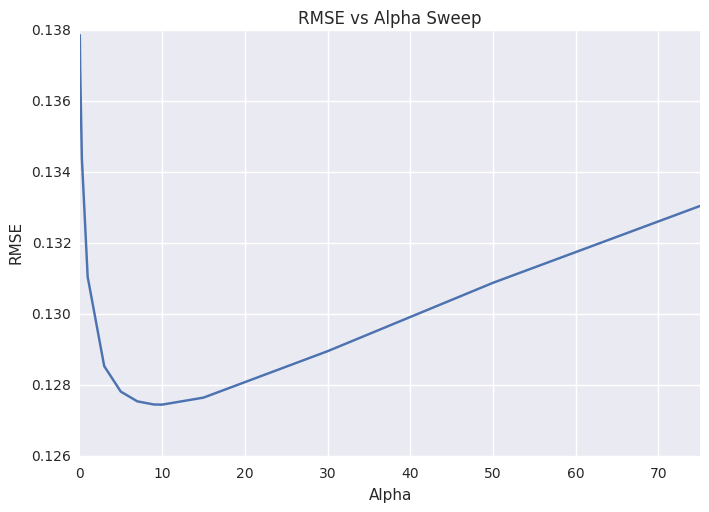

In [13]:
# Make a plot for RMSE vs Alphas to see where is the minimum
rmse = []
for i in score:
    rmse.append(np.sqrt(-i))
print(rmse)

alphas = [0.05, 0.1, 0.3, 1, 3, 5, 7, 9, 10, 15, 30, 50, 75]
cv_ridge = pd.Series(rmse, index = alphas)
_ = cv_ridge.plot(title = "RMSE vs Alpha Sweep")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

print("Minimum RMSE for Ridge: ", cv_ridge.min())

In [14]:
# Do a quick CV to see what RMSE score we can expect from Ridge.
ridge = Ridge(alpha=10)
ridge_rmse = np.sqrt(-cross_val_score(ridge, x_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print(ridge_rmse.mean())

0.127170314589


In [14]:
# Do CV for Lasso to find the best alpha.
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.00099, 0.0005], cv=10).fit(x_train, y_train)
lasso_score = np.sqrt(-cross_val_score(model_lasso, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))
lasso_pred = model_lasso.predict(x_test)
print(lasso_score.mean(), "Chosen alpha: ", model_lasso.alpha_)

(0.12117842839579851, 'Chosen alpha: ', 0.00050000000000000001)


Lasso picked 108 variables and eliminated the other 180 variables


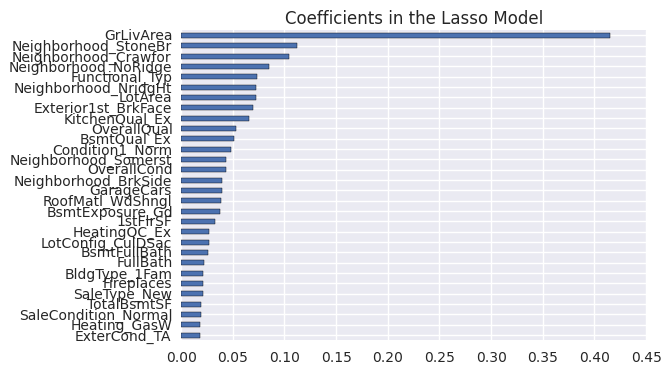

In [118]:
# Visualize the features selected by Lasso. Top 30.
coef = pd.Series(model_lasso.coef_, index = x_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " \
      +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values(ascending=False).head(30)])
_ = imp_coef.plot(kind = "barh").invert_yaxis()
_ = plt.title("Coefficients in the Lasso Model")

Add XGBoost to the model to prepare for stacking.

In [15]:
import xgboost as xgb
from xgboost import XGBRegressor

395
     test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0         10.380549       0.033581        10.380597        0.007438
1          9.345179       0.034108         9.345234        0.007003
2          8.413494       0.034712         8.413555        0.006472
3          7.575317       0.034957         7.575385        0.006331
4          6.820187       0.034038         6.820562        0.005886
5          6.140813       0.033625         6.141427        0.005130
6          5.528577       0.032436         5.529924        0.004770
7          4.978838       0.031182         4.979537        0.004136
8          4.484406       0.029502         4.484247        0.003711
9          4.039408       0.028108         4.038837        0.003736
10         3.638633       0.027232         3.638013        0.003516
11         3.277021       0.025671         3.276845        0.003119
12         2.952215       0.024284         2.951804        0.002946
13         2.659706       0.022667         2

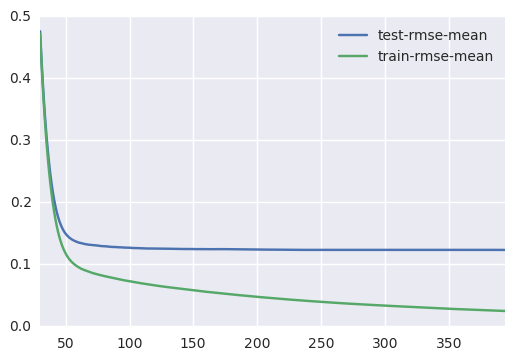

In [18]:
# Use CV to tune n_estimators needed.
xgb_cv_params = {'max_depth': 4, \
                 'subsample': 0.8, \
                 'n_estimators': 1000, \
                 'learning_rate': 0.1, \
                 'colsample_bytree': 0.5, \
                 'min_child_weight': 2, \
                 'gamma': 0, \
                 'scale_pos_weight': 1, \
                 'seed': 42, \
                }
model = xgb.cv(params=xgb_cv_params, \
               dtrain=xgb.DMatrix(x_train, y_train), \
               num_boost_round=1000, \
               nfold=5, \
               metrics='rmse', \
               early_stopping_rounds=100)

print(model.shape[0]) # This tells us n_estimators is 395
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
print(model)

In [59]:
# Grid Search with XGBoost. Tuning max_depth & min_child_weight
xgb_model = XGBRegressor()
xgb_params = {'max_depth': [3], \
              'subsample': [0.7], \
              'n_estimators': [5000], \
              'learning_rate': [0.01], \
              'colsample_bytree': [0.6], \
              'min_child_weight': [1.25], \
              'gamma': [0], \
              'scale_pos_weight': [1], \
              'reg_lambda':[0.9], \
              'seed': [42]
             }
# colsample_bytree = sqrt(288) = 17, because 288 features
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, verbose=1, scoring='neg_mean_squared_error')
xgb_grid.fit(x_train, y_train)
score = xgb_grid.cv_results_
print("Score: ", score)
print("mean_test_score: ", score['mean_test_score'])

mean_test_score = score['mean_test_score'].mean()
print("Average mean_test_score: ", mean_test_score)

xgb_pred = xgb_grid.predict(x_test) # This is the input training set for our stacked model.
print xgb_pred

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


('Score: ', {'std_train_score': array([  5.09704683e-05]), 'rank_test_score': array([1], dtype=int32), 'param_max_depth': masked_array(data = [3],
             mask = [False],
       fill_value = ?)
, 'split4_test_score': array([-0.01548369]), 'param_gamma': masked_array(data = [0],
             mask = [False],
       fill_value = ?)
, 'split2_train_score': array([-0.00118405]), 'param_subsample': masked_array(data = [0.7],
             mask = [False],
       fill_value = ?)
, 'std_score_time': array([ 0.00939369]), 'param_seed': masked_array(data = [42],
             mask = [False],
       fill_value = ?)
, 'split4_train_score': array([-0.0012621]), 'split2_test_score': array([-0.01572719]), 'mean_score_time': array([ 0.05990539]), 'mean_fit_time': array([ 22.65033021]), 'split3_train_score': array([-0.00133773]), 'split0_train_score': array([-0.00128639]), 'std_test_score': array([ 0.00232854]), 'param_colsample_bytree': masked_array(data = [0.6],
             mask = [False],
       

In [60]:
# Pretty printing the results.
print(xgb_grid.best_params_)
print(xgb_grid.best_score_, np.sqrt(-xgb_grid.best_score_))
print'\n'
print(score['params'])
df = pd.DataFrame()
df['rmse_train_score'] = np.sqrt(-score['mean_train_score'])
df['rmse_test_score'] = np.sqrt(-score['mean_test_score'])
print'\n'
print(df)
# df.to_csv('xgb_cv_2.csv',header=True, index_label='id')

{'colsample_bytree': 0.6, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'min_child_weight': 1.25, 'n_estimators': 5000, 'subsample': 0.7, 'reg_lambda': 0.9, 'seed': 42, 'max_depth': 3, 'gamma': 0}
(-0.014170826462371455, 0.1190412804970253)


({'colsample_bytree': 0.6, 'scale_pos_weight': 1, 'learning_rate': 0.01, 'min_child_weight': 1.25, 'n_estimators': 5000, 'subsample': 0.7, 'reg_lambda': 0.9, 'seed': 42, 'max_depth': 3, 'gamma': 0},)


   rmse_train_score  rmse_test_score
0          0.035519         0.119041


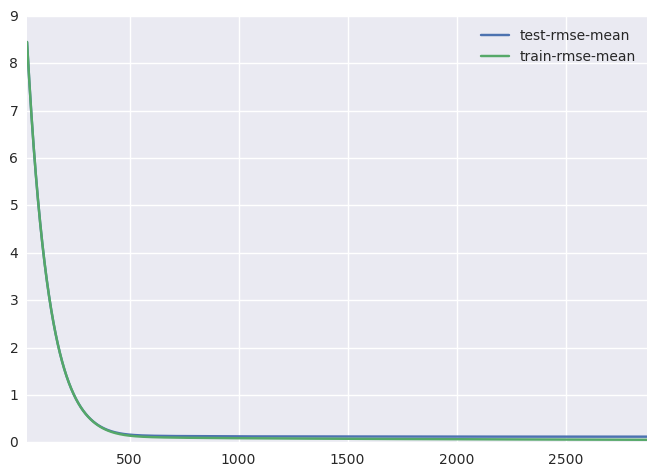

In [16]:
# After CV Check & Grid Search, we found the following parameters are the best.
# We use CV to check for overfitting.
xgb_cv_params = {'max_depth': 3, \
                 'subsample': 0.7, \
                 'n_estimators': 5000, \
                 'learning_rate': 0.01, \
                 'colsample_bytree': 0.6, \
                 'min_child_weight': 1.25, \
                 'gamma': 0, \
                 'scale_pos_weight': 1, \
                 'seed': 42, \
                }
model = xgb.cv(params=xgb_cv_params, \
               dtrain=xgb.DMatrix(x_train, y_train), \
               num_boost_round=5000, \
               nfold=5, \
               metrics='rmse', \
               early_stopping_rounds=100)

model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
# print(model)

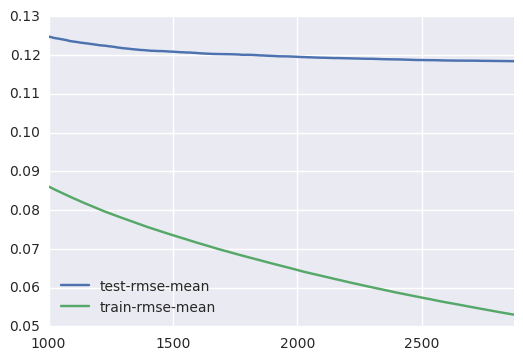

In [101]:
# Seems OK.
model.loc[1000:,["test-rmse-mean", "train-rmse-mean"]].plot()

Prepare stacking model below:
1. lasso
2. ridge
3. xgb

Wrapper:
Linear Regression

In [23]:
# We will use this function repeatedly for all 4 models to generate
# predicted weights to be trained for the stacked model.

def cv_model_output(model_func, model_name, x, y, n_folds=3):
    ''' Pass in a model with defined parameters,
    its name in string, x (features) to be trained,
    y (labels), and number of CV. '''

    folds = KFold(n_splits=n_folds)
    x_cv = np.array(x)
    y_cv = np.array(y)

    for k, (train_index, validation_index) in enumerate(folds.split(x_train)):
        x_cv_train, x_cv_val = x_cv[train_index], x_cv[validation_index]
        y_cv_train, y_cv_val = y_cv[train_index], y_cv[validation_index]

        model_func.fit(x_cv_train, y_cv_train)
        np.savetxt('{}_pred_fold_{}.txt'.format(model_name, k), np.exp(model_func.predict(x_cv_val)))
        np.savetxt('{}_test_fold_{}.txt'.format(model_name, k), y_cv_val)

In [19]:
# 1. Lasso with KFold. To be used for stacking.
ls_stack = Lasso(alpha=0.0005)
cv_model_output(ls_stack, 'ls', x_train, y_train, 3)

In [22]:
# 2. Ridge with KFold. To be used for stacking.
ridge_stack = Ridge(alpha=10)
cv_model_output(ridge_stack, 'ridge', x_train, y_train, 3)

In [24]:
# 3. Prepare XGB Kfold for stacker model.
xgb_stack = XGBRegressor(max_depth=3, \
                         subsample=0.7, \
                         n_estimators=5000, \
                         learning_rate=0.01, \
                         colsample_bytree=0.6, \
                         min_child_weight=1.25, \
                         gamma=0, \
                         scale_pos_weight=1, \
                         seed=42)
cv_model_output(xgb_stack, 'xgb', x_train, y_train, 3)

In [61]:
# 4. Prepare KNN for stacker model.
from sklearn.neighbors import KNeighborsRegressor

# Grid search to find the best n_neighbors for KNN.
parameters = {'n_neighbors':[10, 14, 22]}
neigh = KNeighborsRegressor(weights='distance')
neigh_grid = GridSearchCV(neigh, parameters, cv=10, verbose=0, n_jobs=2, scoring='neg_mean_squared_error')
neigh_grid.fit(x_train, y_train)

score = neigh_grid.cv_results_
print "\nmean_test_score: ", np.sqrt(-score['mean_test_score'])
print "\nParams: ", score['params']

best_param = neigh_grid.best_params_
print "\nBest Parameter is: ", best_param
print "\nBest Score is: ", neigh_grid.best_score_, np.sqrt(-neigh_grid.best_score_)

# Make prediction on the whole test set.
# Use this as input for wrapper (LinearRegression) prediction
knn_pred = neigh_grid.predict(x_test)


mean_test_score:  [ 0.25140006  0.25153174  0.25243262]

Params:  ({'n_neighbors': 10}, {'n_neighbors': 14}, {'n_neighbors': 22})

Best Parameter is:  {'n_neighbors': 10}

Best Score is:  -0.0632019894702 0.251400058612


In [27]:
# 4...continued, KNN with KFold. To be used for stacking.
knn_stack = KNeighborsRegressor(weights='distance', n_neighbors=14)
cv_model_output(knn_stack, 'knn', x_train, y_train, 3)

In [62]:
# Function to load in all models.
def load_model(model_name, n_folds=3):
    ''' Input the model name to be loaded, and n_folds used.
    Returns the model that is aggregated from weights predicted from CV sets. '''

    train = []
    for i in range(n_folds):
        train.append(np.loadtxt('model/{}_pred_fold_{}.txt'.format(model_name, i)))

    return train

In [67]:
# Stacker model (Lasso + Ridge + XGB + KNN) using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Aggregate weights to be passed into layer 2 model
# 1. This is Lasso predicted weights from Kfold training set
train_lasso = load_model('lasso', 3)
train_lasso_folds = np.hstack((train_lasso[0], train_lasso[1], train_lasso[2]))
print "\nChecking Lasso trainin set size: ", train_lasso_folds.shape

rmse_check_1 = np.sqrt(mean_squared_error(np.log(train_lasso_folds), y_train))
print "Lasso RMSE: ", rmse_check_1


# 2. This is Ridge predicted weights from Kfold training set
train_ridge = load_model('ridge', 3)
train_ridge_folds = np.hstack((train_ridge[0], train_ridge[1], train_ridge[2]))
print "\nChecking Ridge trainin set size: ", train_ridge_folds.shape

rmse_check_2 = np.sqrt(mean_squared_error(np.log(train_ridge_folds), y_train))
print "Ridge RMSE: ", rmse_check_2


# 3. This is xgb predicted weights from Kfold training set
train_xgb = load_model('xgb', 3)
train_xgb_folds = np.hstack((train_xgb[0], train_xgb[1], train_xgb[2]))
print "\nChecking XGB training set size: ", train_xgb_folds.shape

rmse_check_3 = np.sqrt(mean_squared_error(np.log(train_xgb_folds), y_train))
print "XGB RMSE: ", rmse_check_3


# 4. This is knn predicted weights from Kfold training set
train_knn = load_model('knn', 3)
train_knn_folds = np.hstack((train_knn[0], train_knn[1], train_knn[2]))
print "\nChecking knn training set size: ", train_knn_folds.shape

rmse_check_4 = np.sqrt(mean_squared_error(np.log(train_knn_folds), y_train))
print "knn RMSE: ", rmse_check_4


# Stacking starts here.
layer_1_train_x = np.vstack((train_xgb_folds, train_lasso_folds, train_ridge_folds, train_knn_folds)).T
layer_1_test_x = np.vstack((xgb_pred, lasso_pred, ridge_pred, knn_pred)).T
lr = LinearRegression()
lr_rmse = np.sqrt(-cross_val_score(lr, np.log(layer_1_train_x), y_train, cv=5, scoring='neg_mean_squared_error'))
print "\nStacker RMSE: ", (lr_rmse.mean())

lr.fit(np.log(layer_1_train_x), y_train)
final_pred = lr.predict(layer_1_test_x)
df_final_pred = pd.DataFrame(np.exp(final_pred), index=test["Id"], columns=["SalePrice"])
# df_final_pred.to_csv('submission5.csv', header=True, index_label='Id')
print "\n", df_final_pred.head()


Checking Lasso trainin set size:  (1460,)
Lasso RMSE:  0.124440888053

Checking Ridge trainin set size:  (1460,)
Ridge RMSE:  0.111635130632

Checking XGB training set size:  (1460,)
XGB RMSE:  0.12071158228

Checking knn training set size:  (1460,)
knn RMSE:  0.260948777896
(1459,) (1459,) (1459,) (1459,)

Stacker RMSE:  0.107309628305

          SalePrice
Id                 
1461  120205.665372
1462  158930.784002
1463  186395.937365
1464  195769.025028
1465  189539.239885
